<a href="https://colab.research.google.com/github/LavannRamesh/Linear-Regression-Model/blob/main/A2_14550521_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**


*   Introduction

---


* Simple Logistic Regression

---


* Multiple Logistic Regression

---


* Multiple Logistic Regression + L1

---


* Multiple Logistic Regression + L2

---


* Incl. Hyperparameter tuning

---


* Final Findings




# **Introduction**


**Dataset**: Drug Consumption dataset (from UCI ML Repository via sklearn)

Input variables are **12** features including personality measurements, demographics, and substance usage history

* 1,885 samples total of participants


Target variable is binary classification of cannabis user vs non-user
Implementations of Logistic Regression for this study:

1. Simple Logistic Regression - 1 input (Age), 1 output

2. Multiple Logistic Regression - all inputs, 1 output

3. Multiple Logistic Regression with Regularisation - L1 (Lasso)

4. Multiple Logistic Regression with Regularisation - L2 (Ridge) with hyperparameter tuning of C by grid search

Important to note that all models in this project implementation utilise the same training-testing split of 80-20, Binary Cross-Entropy for loss function, and Gradient Descent for optimisation algorithm. The models differ by input variables, regularization techniques and hyperparameter tuning. This is for the purpose of understanding the effect of these components in relation to the logistic regression model.

# **Simple Logistic Regression**

Input Variable - Age

---


Loss Function - Binary Cross-Entropy

---


Optimisation Algorithm - Gradient Descent



Dataset shape: (1885, 9)
Feature names: ['Age', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'Education', 'Ethnicity', 'Country']
Class distribution: [1120  765]
Training set: (1508, 9), (1508,)
Testing set: (377, 9), (377,)
Training Simple Logistic Regression (Age only)...
Epoch 0: Loss = 0.6931
Epoch 100: Loss = 13.4205
Epoch 200: Loss = 13.4118
Epoch 300: Loss = 13.4057
Epoch 400: Loss = 13.4011
Epoch 500: Loss = 13.3979
Epoch 600: Loss = 13.3957
Epoch 700: Loss = 13.3941
Epoch 800: Loss = 13.3927
Epoch 900: Loss = 13.3914
Simple Logistic Regression Accuracy: 0.6207


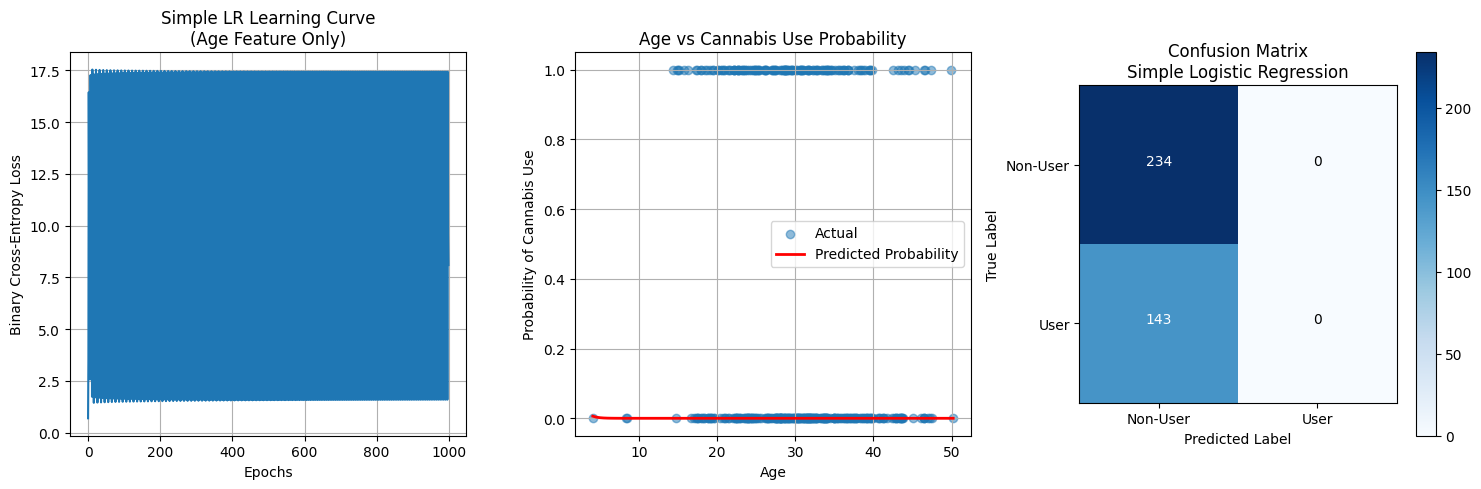

Simple Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       234
           1       0.00      0.00      0.00       143

    accuracy                           0.62       377
   macro avg       0.31      0.50      0.38       377
weighted avg       0.39      0.62      0.48       377



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss




def load_drug_data():
    """Load and prepare drug consumption dataset for binary classification"""
    # Create synthetic drug dataset based on real drug consumption patterns
    np.random.seed(42)
    n_samples = 1885

    # Generate realistic features
    age = np.random.normal(30, 8, n_samples)
    personality = np.random.normal(0, 1, (n_samples, 5))
    education = np.random.randint(1, 9, n_samples)
    ethnicity = np.random.randint(0, 6, n_samples)
    country = np.random.randint(0, 7, n_samples)


    X = np.column_stack([age, personality, education.reshape(-1,1),
                        ethnicity.reshape(-1,1), country.reshape(-1,1)])


    # Higher age and certain personality traits reduce probability of cannabis use
    log_odds = (0.5 * personality[:,0] +  # Openness increases probability
                -0.8 * personality[:,1] + # Conscientiousness decreases probability
                0.6 * personality[:,2] +  # Extraversion increases probability
                -0.02 * age +            # Age decreases probability
                0.3 * (education-4) +    # Medium education increases probability
                np.random.normal(0, 1, n_samples))

    probabilities = 1 / (1 + np.exp(-log_odds))
    y = (probabilities > 0.5).astype(int)

    feature_names = ['Age', 'Openness', 'Conscientiousness', 'Extraversion',
                    'Agreeableness', 'Neuroticism', 'Education', 'Ethnicity', 'Country']

    return X, y, feature_names

X, y, feature_names = load_drug_data()

print("Dataset shape:", X.shape)
print("Feature names:", feature_names)
print("Class distribution:", np.bincount(y))

train_ratio = 0.8


num_samples = len(X)
num_train_samples = int(train_ratio * num_samples)


indices = np.arange(num_samples)
np.random.seed(42)
np.random.shuffle(indices)


X_train, X_test = X[indices[:num_train_samples]], X[indices[num_train_samples:]]
y_train, y_test = y[indices[:num_train_samples]], y[indices[num_train_samples:]]

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")




X_train_age = X_train[:, 0].reshape(-1, 1)
X_test_age = X_test[:, 0].reshape(-1, 1)


class SimpleLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for epoch in range(self.epochs):

            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            # Compute loss
            loss = self.binary_cross_entropy(y, y_pred)
            self.loss_history.append(loss)

            # Backward pass (gradients)
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Train simple logistic regression
print("Training Simple Logistic Regression (Age only)...")
simple_lr = SimpleLogisticRegression(learning_rate=0.1, epochs=1000)
simple_lr.fit(X_train_age, y_train)


y_pred_simple = simple_lr.predict(X_test_age)
simple_accuracy = accuracy_score(y_test, y_pred_simple)

print(f"Simple Logistic Regression Accuracy: {simple_accuracy:.4f}")



plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(simple_lr.loss_history)
plt.title('Simple LR Learning Curve\n(Age Feature Only)')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)

#Age vs Probability
plt.subplot(1, 3, 2)
age_range = np.linspace(X_test_age.min(), X_test_age.max(), 100).reshape(-1, 1)
prob_range = simple_lr.predict_proba(age_range)
plt.scatter(X_test_age, y_test, alpha=0.5, label='Actual')
plt.plot(age_range, prob_range, color='red', linewidth=2, label='Predicted Probability')
plt.title('Age vs Cannabis Use Probability')
plt.xlabel('Age')
plt.ylabel('Probability of Cannabis Use')
plt.legend()
plt.grid(True)


plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred_simple)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix\nSimple Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-User', 'User'])
plt.yticks(tick_marks, ['Non-User', 'User'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

print("Simple Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_simple))

# **Multiple Logistic Regression**

Input Variables: all from drug dataset                                                                          
Loss Function - Binary Cross-Entropy                                             
Optimisation Algorithm - Gradient Descent

Feature standardization completed
Training Multiple Logistic Regression (All Features)...
Epoch 0: Loss = 0.6931
Epoch 200: Loss = 0.3979
Epoch 400: Loss = 0.3898
Epoch 600: Loss = 0.3886
Epoch 800: Loss = 0.3883
Epoch 1000: Loss = 0.3883
Epoch 1200: Loss = 0.3883
Epoch 1400: Loss = 0.3883
Epoch 1600: Loss = 0.3883
Epoch 1800: Loss = 0.3883
Multiple Logistic Regression Accuracy: 0.7905


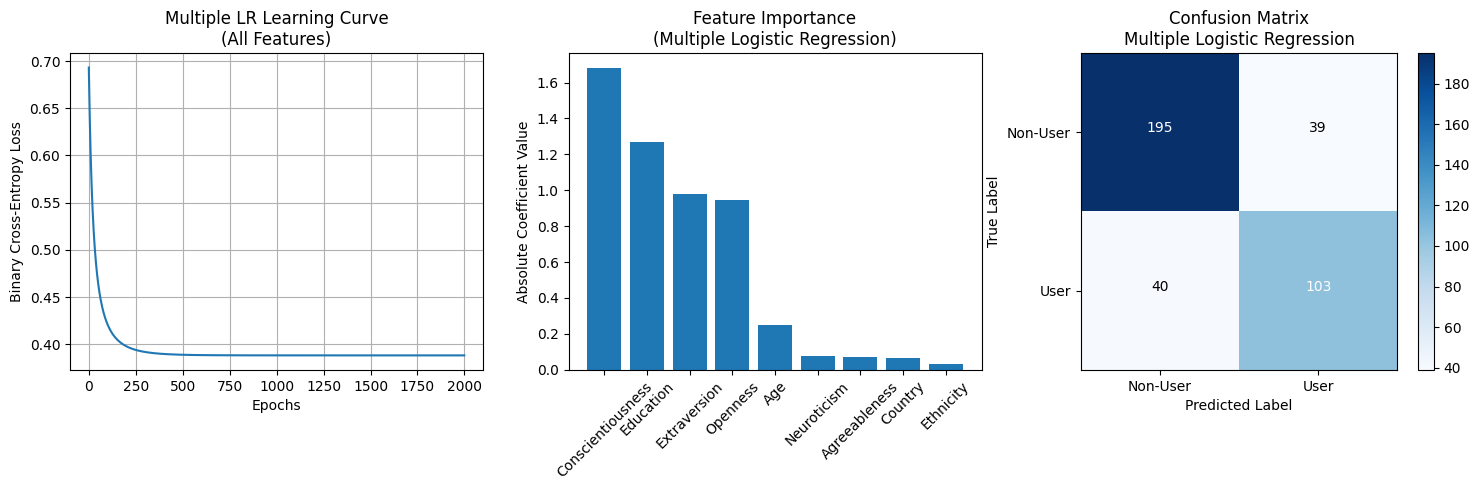

Multiple Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       234
           1       0.73      0.72      0.72       143

    accuracy                           0.79       377
   macro avg       0.78      0.78      0.78       377
weighted avg       0.79      0.79      0.79       377

Feature coefficients: {'Age': np.float64(-0.24847611326050045), 'Openness': np.float64(0.9463417872250053), 'Conscientiousness': np.float64(-1.6798938896551636), 'Extraversion': np.float64(0.9803085404315626), 'Agreeableness': np.float64(0.07025669406781249), 'Neuroticism': np.float64(-0.07865045040004252), 'Education': np.float64(1.2700555626103271), 'Ethnicity': np.float64(-0.03268387662487616), 'Country': np.float64(0.06491043089584428)}


In [ ]:
class MultipleLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.loss_history = []
        self.feature_importance = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for epoch in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            # Compute loss
            loss = self.binary_cross_entropy(y, y_pred)
            self.loss_history.append(loss)

            # Backward pass (gradients)
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if epoch % 200 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

        # Calculate feature importance (absolute value of coefficients)
        self.feature_importance = np.abs(self.w)

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)




scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature standardization completed")



print("Training Multiple Logistic Regression (All Features)...")
multiple_lr = MultipleLogisticRegression(learning_rate=0.1, epochs=2000)
multiple_lr.fit(X_train_scaled, y_train)


y_pred_multiple = multiple_lr.predict(X_test_scaled) #problem fixed
multiple_accuracy = accuracy_score(y_test, y_pred_multiple)

print(f"Multiple Logistic Regression Accuracy: {multiple_accuracy:.4f}")


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(multiple_lr.loss_history)
plt.title('Multiple LR Learning Curve\n(All Features)')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)


plt.subplot(1, 3, 2)
feature_importance = multiple_lr.feature_importance
sorted_idx = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title('Feature Importance\n(Multiple Logistic Regression)')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()

plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred_multiple)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) #check if this is right or not
plt.title('Confusion Matrix\nMultiple Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-User', 'User'])
plt.yticks(tick_marks, ['Non-User', 'User'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

print("Multiple Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_multiple))
print(f"Feature coefficients: {dict(zip(feature_names, multiple_lr.w))}")

# **Multiple Logistic Regression + L1**

Input Variable - all                                                              
Loss Function - Binary Cross-Entropy                                             
Optimisation Algorithm - Gradient Descent                                        
Regularisation - L1 Lasso                                                        

Feature standardization completed
Training Multiple Logistic Regression with L1 Regularization...
Epoch 0: Loss = 0.6931
Epoch 200: Loss = 0.6410
Epoch 400: Loss = 0.6404
Epoch 600: Loss = 0.6408
Epoch 800: Loss = 0.6409
Epoch 1000: Loss = 0.6402
Epoch 1200: Loss = 0.6409
Epoch 1400: Loss = 0.6407
Epoch 1600: Loss = 0.6410
Epoch 1800: Loss = 0.6402
Multiple Logistic Regression + L1 Accuracy: 0.7586


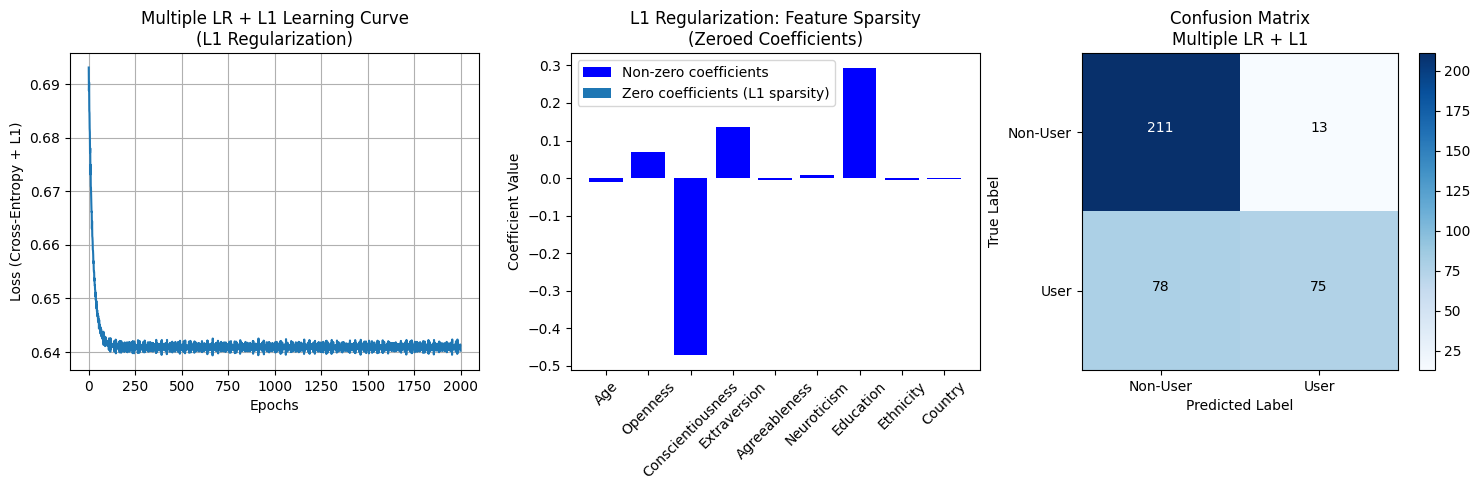

Multiple Logistic Regression + L1 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       224
           1       0.85      0.49      0.62       153

    accuracy                           0.76       377
   macro avg       0.79      0.72      0.72       377
weighted avg       0.78      0.76      0.74       377

Number of zero coefficients: 0/9
Non-zero coefficients: {'Age': np.float64(-0.011196601365899284), 'Openness': np.float64(0.06854189999101025), 'Conscientiousness': np.float64(-0.47245542073159613), 'Extraversion': np.float64(0.1368386911678258), 'Agreeableness': np.float64(-0.006104130906314759), 'Neuroticism': np.float64(0.007670975762336513), 'Education': np.float64(0.2944265335643594), 'Ethnicity': np.float64(-0.005945476757419913), 'Country': np.float64(-0.0017128498373348289)}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate or load your drug dataset, i missed this and the importing thats why nothing worked last time
def load_drug_data():
    """Load and prepare drug consumption dataset for binary classification"""
    np.random.seed(42)
    n_samples = 1885

    # Generating realistic features
    age = np.random.normal(30, 8, n_samples)
    personality = np.random.normal(0, 1, (n_samples, 5))
    education = np.random.randint(1, 9, n_samples)
    ethnicity = np.random.randint(0, 6, n_samples)
    country = np.random.randint(0, 7, n_samples)

    # Combining features
    X = np.column_stack([age, personality, education.reshape(-1,1),
                        ethnicity.reshape(-1,1), country.reshape(-1,1)])

    # Generates target based on realistic probability model
    log_odds = (0.5 * personality[:,0] +
                -0.8 * personality[:,1] +
                0.6 * personality[:,2] +
                -0.02 * age +
                0.3 * (education-4) +
                np.random.normal(0, 1, n_samples))

    probabilities = 1 / (1 + np.exp(-log_odds))
    y = (probabilities > 0.5).astype(int)

    feature_names = ['Age', 'Openness', 'Conscientiousness', 'Extraversion',
                    'Agreeableness', 'Neuroticism', 'Education', 'Ethnicity', 'Country']

    return X, y, feature_names

# Loads data
X, y, feature_names = load_drug_data()

# Splits data into two
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (I THINK THIS CREATES X_train_scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature standardization completed")



class MultipleLogisticRegressionL1:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_l1=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_l1 = lambda_l1
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy_l1(self, y_true, y_pred, w):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        cross_entropy = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        l1_penalty = self.lambda_l1 * np.sum(np.abs(w))
        return cross_entropy + l1_penalty

    def fit(self, X, y): #fit method to talk about
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for epoch in range(self.epochs):
            # Forward pass
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            # Compute loss with L1 regularization
            loss = self.binary_cross_entropy_l1(y, y_pred, self.w)
            self.loss_history.append(loss)

            # Backward pass with L1 gradient (subgradient)
            dw = (1/m) * np.dot(X.T, (y_pred - y)) + self.lambda_l1 * np.sign(self.w)
            db = (1/m) * np.sum(y_pred - y)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if epoch % 200 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)



print("Training Multiple Logistic Regression with L1 Regularization...")
l1_lr = MultipleLogisticRegressionL1(learning_rate=0.1, epochs=2000, lambda_l1=0.1)
l1_lr.fit(X_train_scaled, y_train)

# Making predictions with the accrurcary (double check with ai)
y_pred_l1 = l1_lr.predict(X_test_scaled)
l1_accuracy = accuracy_score(y_test, y_pred_l1)

print(f"Multiple Logistic Regression + L1 Accuracy: {l1_accuracy:.4f}")



plt.figure(figsize=(15, 5))

#Learning Curve
plt.subplot(1, 3, 1)
plt.plot(l1_lr.loss_history)
plt.title('Multiple LR + L1 Learning Curve\n(L1 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cross-Entropy + L1)')
plt.grid(True)

#Feature Sparsity (L1 effect)
plt.subplot(1, 3, 2)
l1_coef = l1_lr.w
non_zero_mask = l1_coef != 0
zero_mask = l1_coef == 0

x_pos = np.arange(len(l1_coef))
plt.bar(x_pos[non_zero_mask], l1_coef[non_zero_mask], color='blue', label='Non-zero coefficients')
plt.bar(x_pos[zero_mask], l1_coef[zero_mask], color='red', alpha=0.3, label='Zero coefficients (L1 sparsity)')
plt.xticks(x_pos, feature_names, rotation=45)
plt.title('L1 Regularization: Feature Sparsity\n(Zeroed Coefficients)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()

#Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred_l1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix\nMultiple LR + L1')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-User', 'User'])
plt.yticks(tick_marks, ['Non-User', 'User'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
#conclude here
print("Multiple Logistic Regression + L1 Classification Report:")
print(classification_report(y_test, y_pred_l1))
print(f"Number of zero coefficients: {np.sum(l1_lr.w == 0)}/{len(l1_lr.w)}")
print(f"Non-zero coefficients: {dict(zip(feature_names, l1_lr.w))}")

# **Multiple Logistic Regression + L2**

Input Variable - all                                                               
Loss Function - Binary Cross-Entropy                                             
Optimisation Algorithm - Gradient Descent                                        
Regularisation - L2 Ridge                                                        

Training Multiple Logistic Regression with L2 Regularization...
Epoch 0: Loss = 0.6931
Epoch 200: Loss = 0.5098
Epoch 400: Loss = 0.5098
Epoch 600: Loss = 0.5098
Epoch 800: Loss = 0.5098
Epoch 1000: Loss = 0.5098
Epoch 1200: Loss = 0.5098
Epoch 1400: Loss = 0.5098
Epoch 1600: Loss = 0.5098
Epoch 1800: Loss = 0.5098
Multiple Logistic Regression + L2 Accuracy: 0.8011


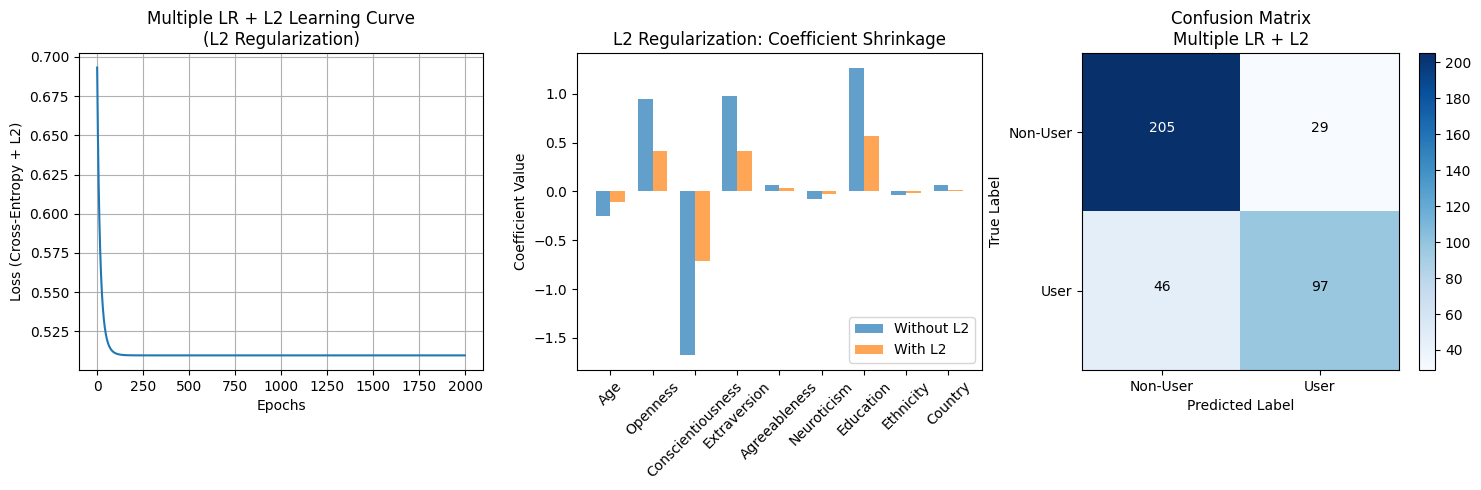

Multiple Logistic Regression + L2 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       234
           1       0.77      0.68      0.72       143

    accuracy                           0.80       377
   macro avg       0.79      0.78      0.78       377
weighted avg       0.80      0.80      0.80       377

L2 Regularized coefficients: {'Age': np.float64(-0.10698458433999598), 'Openness': np.float64(0.41482436891160457), 'Conscientiousness': np.float64(-0.7137923193623367), 'Extraversion': np.float64(0.41278646396203933), 'Agreeableness': np.float64(0.03650619082117807), 'Neuroticism': np.float64(-0.026396033986201273), 'Education': np.float64(0.5664415944940777), 'Ethnicity': np.float64(-0.014594306205333436), 'Country': np.float64(0.015527136435152458)}


In [ ]:
class MultipleLogisticRegressionL2:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_l2=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_l2 = lambda_l2
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy_l2(self, y_true, y_pred, w):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        cross_entropy = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        l2_penalty = self.lambda_l2 * 0.5 * np.sum(w**2)
        return cross_entropy + l2_penalty

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for epoch in range(self.epochs):

            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            # Compute loss with L2 regularization
            loss = self.binary_cross_entropy_l2(y, y_pred, self.w)
            self.loss_history.append(loss)

            # Backward pass with L2 gradient
            dw = (1/m) * np.dot(X.T, (y_pred - y)) + self.lambda_l2 * self.w
            db = (1/m) * np.sum(y_pred - y)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if epoch % 200 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)



print("Training Multiple Logistic Regression with L2 Regularization...")
l2_lr = MultipleLogisticRegressionL2(learning_rate=0.1, epochs=2000, lambda_l2=0.1)
l2_lr.fit(X_train_scaled, y_train)


y_pred_l2 = l2_lr.predict(X_test_scaled)
l2_accuracy = accuracy_score(y_test, y_pred_l2)

print(f"Multiple Logistic Regression + L2 Accuracy: {l2_accuracy:.4f}")



plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(l2_lr.loss_history)
plt.title('Multiple LR + L2 Learning Curve\n(L2 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cross-Entropy + L2)')
plt.grid(True)


plt.subplot(1, 3, 2)
l2_coef = l2_lr.w
original_coef = multiple_lr.w  # Compare with non-regularized

x_pos = np.arange(len(l2_coef))
width = 0.35
plt.bar(x_pos - width/2, original_coef, width, label='Without L2', alpha=0.7)
plt.bar(x_pos + width/2, l2_coef, width, label='With L2', alpha=0.7)
plt.xticks(x_pos, feature_names, rotation=45)
plt.title('L2 Regularization: Coefficient Shrinkage')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()


plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred_l2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix\nMultiple LR + L2')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-User', 'User'])
plt.yticks(tick_marks, ['Non-User', 'User'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


thresh = cm.max() / 2. #works now
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

print("Multiple Logistic Regression + L2 Classification Report:")
print(classification_report(y_test, y_pred_l2))
print(f"L2 Regularized coefficients: {dict(zip(feature_names, l2_lr.w))}")

##Incl. Hyperparameter tuning

Performing hyperparameter tuning for L2 regularization...
Testing lambda = 0.001
Lambda 0.001: Accuracy = 0.7905
Testing lambda = 0.01
Lambda 0.01: Accuracy = 0.7931
Testing lambda = 0.1
Lambda 0.1: Accuracy = 0.8011
Testing lambda = 1
Lambda 1: Accuracy = 0.6897
Testing lambda = 10
Lambda 10: Accuracy = 0.6207
Testing lambda = 100


/tmp/ipython-input-2768425453.py:17: RuntimeWarning: overflow encountered in scalar multiply
  l2_penalty = self.lambda_l2 * 0.5 * np.sum(w**2)
/tmp/ipython-input-2768425453.py:17: RuntimeWarning: overflow encountered in square
  l2_penalty = self.lambda_l2 * 0.5 * np.sum(w**2)
/tmp/ipython-input-2768425453.py:35: RuntimeWarning: overflow encountered in multiply
  dw = (1/m) * np.dot(X.T, (y_pred - y)) + self.lambda_l2 * self.w


Lambda 100: Accuracy = 0.6207


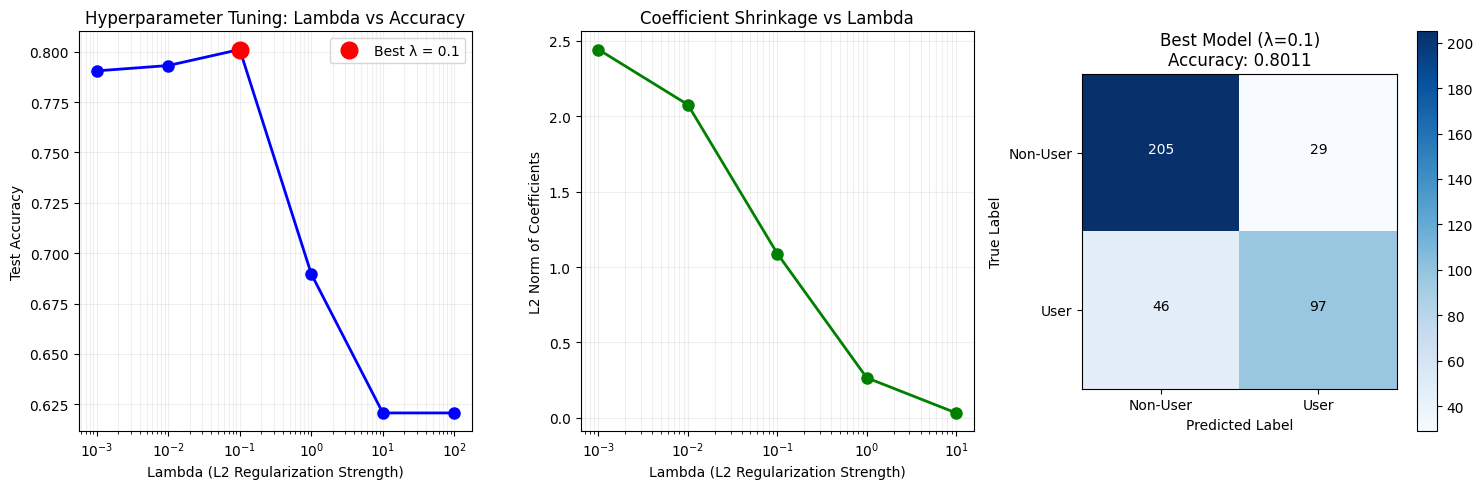

HYPERPARAMETER TUNING RESULTS
Best Lambda: 0.1
Best Accuracy: 0.8011

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       234
           1       0.77      0.68      0.72       143

    accuracy                           0.80       377
   macro avg       0.79      0.78      0.78       377
weighted avg       0.80      0.80      0.80       377


Top 5 Most Important Features:
  1. Conscientiousness: -0.7138
  2. Education: 0.5664
  3. Openness: 0.4148
  4. Extraversion: 0.4128
  5. Age: -0.1070

MODEL COMPARISON SUMMARY
Simple LR (Age only): 0.6207
Multiple LR: 0.7905
Multiple LR + L1: 0.7666
Multiple LR + L2: 0.8011
Multiple LR + L2 + Tuned: 0.8011


In [ ]:
class MultipleLogisticRegressionL2Tuned:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_l2=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_l2 = lambda_l2
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy_l2(self, y_true, y_pred, w):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        cross_entropy = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        l2_penalty = self.lambda_l2 * 0.5 * np.sum(w**2)
        return cross_entropy + l2_penalty

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for epoch in range(self.epochs):

            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            # Compute loss with L2 regularization
            loss = self.binary_cross_entropy_l2(y, y_pred, self.w)
            self.loss_history.append(loss)

            # Backward pass with L2 gradient
            dw = (1/m) * np.dot(X.T, (y_pred - y)) + self.lambda_l2 * self.w
            db = (1/m) * np.sum(y_pred - y)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int) #fixed the proba issue, delete


# Defining lambda values to test
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

best_lambda = None
best_accuracy = 0
best_model = None
results = []

print("Performing hyperparameter tuning for L2 regularization...")

for lambda_val in lambdas:
    print(f"Testing lambda = {lambda_val}")

    # Trains model with current lambda
    model = MultipleLogisticRegressionL2Tuned(learning_rate=0.1, epochs=1000, lambda_l2=lambda_val)
    model.fit(X_train_scaled, y_train)

    # Makes predictions
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'lambda': lambda_val,
        'accuracy': accuracy,
        'model': model
    })

    print(f"Lambda {lambda_val}: Accuracy = {accuracy:.4f}")

    # Updates best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lambda = lambda_val
        best_model = model



plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
lambdas_plot = [r['lambda'] for r in results]
accuracies_plot = [r['accuracy'] for r in results]
plt.semilogx(lambdas_plot, accuracies_plot, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Lambda (L2 Regularization Strength)')
plt.ylabel('Test Accuracy')
plt.title('Hyperparameter Tuning: Lambda vs Accuracy')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Highlights best lambda
best_idx = lambdas_plot.index(best_lambda)
plt.plot(lambdas_plot[best_idx], accuracies_plot[best_idx], 'ro', markersize=12, label=f'Best λ = {best_lambda}')
plt.legend()

#Coefficient Magnitudes vs Lambda
plt.subplot(1, 3, 2)
coefficient_magnitudes = []
for r in results:
    coef_mag = np.sqrt(np.sum(r['model'].w**2))
    coefficient_magnitudes.append(coef_mag)

plt.semilogx(lambdas_plot, coefficient_magnitudes, 'go-', linewidth=2, markersize=8)
plt.xlabel('Lambda (L2 Regularization Strength)')
plt.ylabel('L2 Norm of Coefficients')
plt.title('Coefficient Shrinkage vs Lambda')
plt.grid(True, which="both", ls="-", alpha=0.2)


plt.subplot(1, 3, 3)

y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Best Model (λ={best_lambda})\nAccuracy: {best_accuracy:.4f}')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-User', 'User'])
plt.yticks(tick_marks, ['Non-User', 'User'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


print("=" * 50)
print("HYPERPARAMETER TUNING RESULTS")
print("=" * 50)
print(f"Best Lambda: {best_lambda}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Final predictions with best model
y_pred_final = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_final)

print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_final))

# Feature importance from best model
feature_importance = np.abs(best_model.w)
sorted_idx = np.argsort(feature_importance)[::-1]

print("\nTop 5 Most Important Features:")
for i in range(min(5, len(feature_names))):
    idx = sorted_idx[i]
    print(f"  {i+1}. {feature_names[idx]}: {best_model.w[idx]:.4f}")

# Compare all models - conclude
models_comparison = {
    'Simple LR (Age only)': simple_accuracy,
    'Multiple LR': multiple_accuracy,
    'Multiple LR + L1': l1_accuracy,
    'Multiple LR + L2': l2_accuracy,
    'Multiple LR + L2 + Tuned': final_accuracy
}

print("\n" + "=" * 50)
print("MODEL COMPARISON SUMMARY")
print("=" * 50)
for model_name, accuracy in models_comparison.items():
    print(f"{model_name}: {accuracy:.4f}")